<a href="https://colab.research.google.com/github/wdconinc/practical-computing-for-scientists/blob/master/Lectures/lecture32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 32: Machine Learning

## Last Episode

Logistic regression:
- example of supervised classification problem
- cross entropy loss based on information entropy
- application to diabetes data set

## Preamble

In [0]:
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

## Classification of Iris Flowers

In this lecture we will attempt to classify iris flowers using two different machine learning techniques (we could have used logistic regression covered before).

We use a fairly standard data set in machine learning to demonstrate knn classification. The data set contains input features of three iris types: *Iris Setosa*, *Iris Versicolor*, and *Iris Virginica*. Note that we are not trying to classify based on the images of the irises, but only based on the (human-coded) input features: length and the width of the sepals and petals.

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" height="300px"> <img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" height="300px"> <img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg" height="300px">

We can immediately see that the input featurs are indeed correlated and tend to cluster by classification. Seaborn provides a convenient `pairplot` command that creates a grid of correlations plots, color coded by classification.

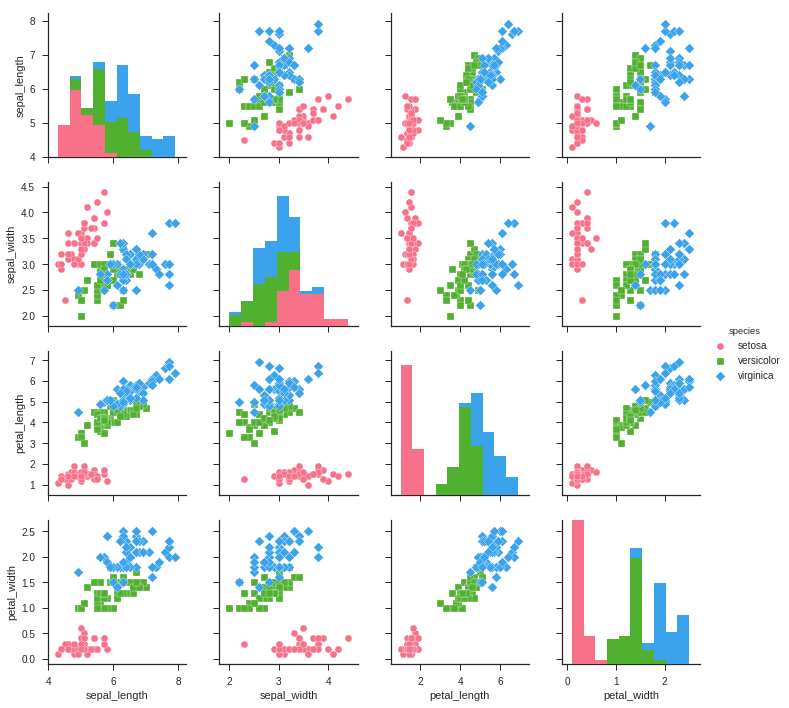

In [0]:
# Plot the correlations and color coding
sns.set(style = "ticks", color_codes = True)

# Load the dataset
iris = sns.load_dataset("iris")
tt = sns.pairplot(iris, 
                  hue = "species", markers = ["o", "s", "D"],
                  palette = "husl", diag_kind = "hist")

In a traditional classification approach we would, by hand and in a problem-specific way) determine our selection criteria. An example could be:
- a petal length below 2.5 cm will indicate *Iris Setosa*,
- for those where petal length is greater than 2.5 cm:
  - a petal width less than 1.6 cm will indicate *Iris Versicolor*,
  - a petal width greater than 1.6 cm will indicate *Iris Virginica*.

The problem with this approach is multifold:
- we do not use the distinguising information in the sepal sizes at all: presumably more information would allow us to reach a more accurate classification,
- we have to repeat this arduous process of finding suitable selection criteria with every new problem we encounter, and indeed with every new entry we may add to our training set.

In this lecture we explore two ways of approaching this problem using concepts in machine learning.
- $k$-Nearest Neighbors ($k$-NN) will be the most general approach,
- decision trees (DT) will automate the approach we use in our traditional, manual classification above.

Before getting started, take a moment to think about which problems in your work may be similar to this problem. I am sure you will be able to think of some.

Note that in this lecture we are using a data set of merely 150 entries (50 for each species) and we will use only 40 for training. You do not need 1000s of entries to start taking advantage of the mathematical techniques that underlie machine leanring.

## $k$-Nearest Neighbors Classification ($k$-NN)

The $k$-Nearest Neighbors ($k$-NN) algorithm is one of the simplest classification supervised learning algorithms that, based on a training data set, can make an inference on new data.

The algorithm is straight forward to understand. We can think of the input feature space as a $n$ dimensional space which projects each vector of input features $X$ onto a single classification $y$.

For two input features ($n = 2$) we can plot all points in a 2-dimensional plane and encode the target class as a color code, as for example in the figure below with training data classified in red and blue triangles and squares.

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg" width="33%">

The question now becomes: when we encounter the green circle (and its input features are used to place it on the figure), then which classification should we assign to it? Does the green circle belong to the blue squares class or to the red triangles class?

The $k$ Nearest Neighbors algorithm looks at the $k$ nearest neighbors of the green circle (though I suspect you already knew that).

For $k = 3$, we consider the three training points in the solid circle: two red triangles over one blue square will give us the classification 'red' for the green circle.

For $k = 5$, we consider the five training points in the dashed circle: two red triangles now lose out to the three blue squares, so our classification for the green circle will now be 'blue'.

We can see that the outcome of our classification depends on $k$: a larger $k$ will consider more neighbors, a small $k$ will consider fewer neighbors (and be more sensitive to the vagueries of the training data set). This is demonstrated in the figures below for a data set (left), a 1-NN classifier (middle), and a 5-NN classifier (right). Many more 'islands' applear for the $k = 1$ classifier than for the $k = 5$ classifier.

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Data3classes.png" width="33%"> <img src="https://upload.wikimedia.org/wikipedia/commons/5/52/Map1NN.png" width="33%"> <img src="https://upload.wikimedia.org/wikipedia/commons/8/8c/Map5NN.png" width="33%">

Naturally, we can extend $k$-NN to more than two dimensions but it become more difficult to plot the results. We must define 'nearest' by introducing a distance metric. For input features which have already been rescaled to $z = (x - \mu) / \sigma$ we can simply use the Euclidean distance $(\sum |x^{test}_i - x^{train}_i|^2)^{1/2}$. But we can also use the Manhattan distance $\sum |x^{test}_i - x^{train}_i|$ or other distance metrics.

Finally, note that we typically pick $k$ to be an odd number. Why? If we had picked $k = 4$ above, then we would have found two red triangles and two blue squares. What is our decision in this case? By using an odd number of neighbors, we avoid having to make a random decision in these cases. Scikit-Learn says in its documentation:
```
Regarding the Nearest Neighbors algorithms, if it is found that two neighbors, neighbor `k+1` and `k`, have identical distances but different labels, the results will depend on the ordering of the training data.
```

### Example: Classification of Iris Flowers using $k$-NN

In [0]:
# Load the data set through sklearn
from sklearn import datasets
iris = datasets.load_iris()

# Separate the data set in features and targets
iris_X = iris.data
iris_y = iris.target

In [0]:
# Print unique target values
print(np.unique(iris_y))

[0 1 2]


In [0]:
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))

# Split iris data in train and test data
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [0]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [0]:
print(knn.predict(iris_X_test) - iris_y_test)

[0 1 0 0 0 0 0 0 0 0]


We can look at the error rate scores for this classification, on both training and test data set.

In [0]:
print(knn.score(iris_X_train, iris_y_train))
print(knn.score(iris_X_test, iris_y_test))

0.9642857142857143
0.9


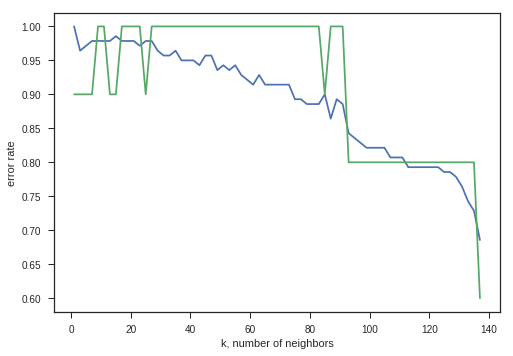

In [0]:
score_train = []
score_test = []
k_values = range(1,139,2)
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(iris_X_train, iris_y_train)
  
  score_train.append(knn.score(iris_X_train, iris_y_train))
  score_test.append(knn.score(iris_X_test, iris_y_test))

plt.plot(k_values, score_train, k_values, score_test)
plt.xlabel("k, number of neighbors")
plt.ylabel("error rate")
plt.show()

## Decision Tree Classification (DT)

We now move on to automating the traditional classification 'by hand' which we applied before. If we have a loss function (for example error rate) we can use this to find the 'best' binary decision tree algorithm given the training data.

We can again use several criteria for the 'best' decision:
- maximum information entropy $- \sum_x p(x) \log p(x)$
- maximum of the Gini index $\sum_x p(x) (1 - p(x))$

We will use the Gini index which is the default in Scikit-Learn's decision tree implementation.

### Example: Classification of Iris Flowers using DT

Let's first install some helper programs (`graphviz`) to visualize the decision graphs we will generate.

In [0]:
!apt install -y graphviz
!pip install graphviz
import graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
iris = datasets.load_iris()

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(iris_X_train, iris_y_train)

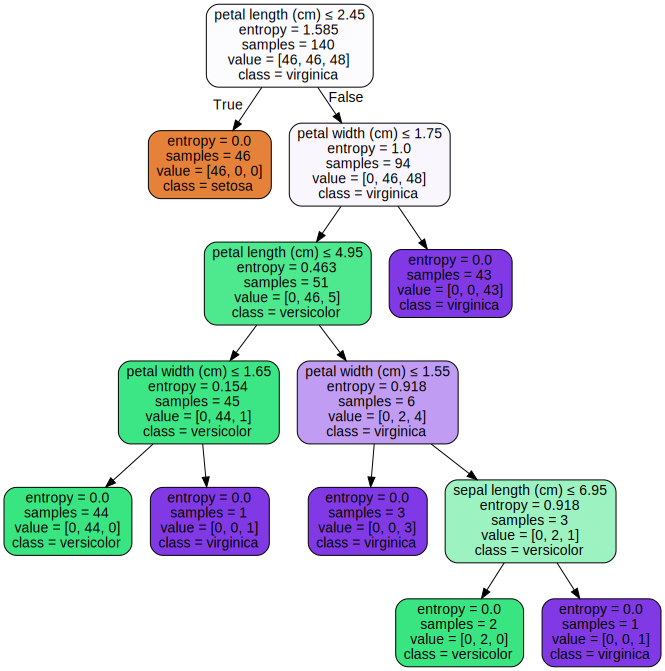

In [0]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file = None, 
                     feature_names = iris.feature_names,  
                     class_names = iris.target_names,  
                     filled = True, rounded = True,  
                     special_characters = True)

graph = graphviz.Source(dot_data)
graph

In [0]:
print(clf.predict(iris_X_test) - iris_y_test)

[0 1 0 0 0 0 0 0 0 0]


In [0]:
print(clf.score(iris_X_train, iris_y_train))
print(clf.score(iris_X_test, iris_y_test))

1.0
0.9


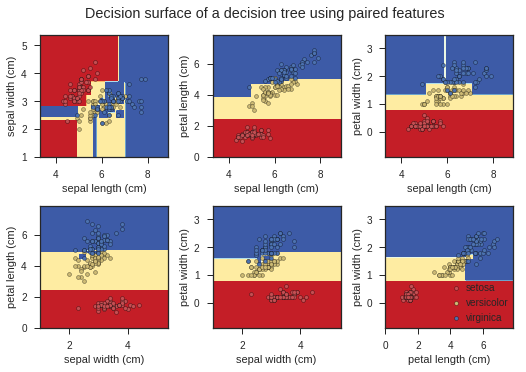

In [0]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
min_samples_split = 2

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier(criterion = "entropy", min_samples_split = min_samples_split).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc = 'lower right', borderpad = 0, handletextpad = 0)
plt.axis("tight")
plt.show()

### Avoiding Overfitting with DTs

As you can see above, the lowest leafs in the tree contain only single samples. We have, in other words, split the training data set down to the individual points. This is what we mean with overfitting: the lowest splits are most likely not indicative of the any underlying behavior, but just caused by the statistical noise in the data.

We can avoid overfitting by introducing a mininum number of samples necessary in a node before we decide to split. Below we pick `min_samples_split` equal to 4, so only when there are 4 or more samples in a node will we split it further. This will avoid overfitting and trim our tree down a bit.

In [0]:
clf = sk.tree.DecisionTreeClassifier(criterion = "entropy", min_samples_split = 10)
clf = clf.fit(iris_X_train, iris_y_train)

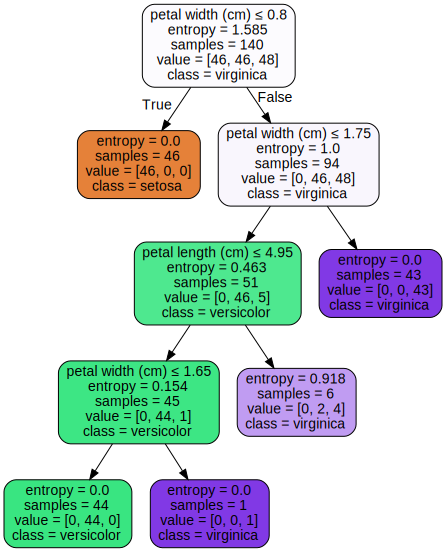

In [0]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file = None, 
                     feature_names = iris.feature_names,  
                     class_names = iris.target_names,  
                     filled = True, rounded = True,  
                     special_characters = True)

graph = graphviz.Source(dot_data)
graph

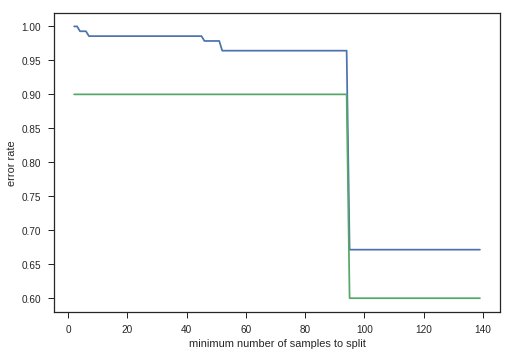

In [0]:
score_train = []
score_test = []
min_sample_values = range(2,140)
for min_sample in min_sample_values:
  clf = sk.tree.DecisionTreeClassifier(criterion = "entropy", min_samples_split = min_sample)
  clf.fit(iris_X_train, iris_y_train)
  
  score_train.append(clf.score(iris_X_train, iris_y_train))
  score_test.append(clf.score(iris_X_test, iris_y_test))

plt.plot(min_sample_values, score_train, min_sample_values, score_test)
plt.xlabel("minimum number of samples to split")
plt.ylabel("error rate")
plt.show()